# I/O and Pandas

In [86]:
import numpy as np
import scipy as sp
import scipy.stats as st
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['figure.figsize'] = (15, 5)

---
## Simple File I/O

### Write to a file.

In [176]:
# Open a file for writing
file = open("foo.txt", "w")

# Write something to the file
file.write("Programming and Data Analysis for Modern Neuroscience\nSpring 2020\n")

# Close the file
file.close()

### Now open foo.txt to see it's contents.

### Read from a file.

In [185]:
# Open a file for reading
file = open("foo.txt", "r")

# Read entire file
str = file.read()
print(str)

# Close the file
file.close()

Programming and Data Analysis for Modern Neuroscience
Spring 2020



### Read a file line by line.

In [201]:
# Open a file for reading
file = open("foo.txt", "r")

# Read file line by line
for line in file:
    print(line)

# Close the file
file.close()

Programming and Data Analysis for Modern Neuroscience

Spring 2020



### Read bits from a file and goto various positions in the file.

In [186]:
# Open a file for reading
file = open("foo.txt", "r")

# Read 10 characters from the file
str = file.read(10)
print("First 10 char are:", str)

# Check current position
position = file.tell()
print("Current file position :", position)

# Reposition to beginning of file
file.seek(0);
str = file.read(10)
print("2nd time: First 10 char are:", str)

# Reposition to 10th character and read next 10 characters
file.seek(10);
str = file.read(10)
print("Next 10 char are:", str)

# Close the file
file.close()

First 10 char are: Programmin
Current file position : 10
2nd time: First 10 char are: Programmin
Next 10 char are: g and Data


### Binary data files.

In [193]:
# Open a binary file for writing
file = open("foo.dat", "wb")

# Write an array of numbers as binary
num = [5, 10, 15, 20, 25]
arr = bytearray(num)
file.write(arr)

# Close the file
file.close()

arr

bytearray(b'\x05\n\x0f\x14\x19')

In [191]:
# Open a binary file for reading
file = open("foo.dat", "rb")

# read the file's binary data
data = file.read()
print(type(data))
print(data)

# Close the file
file.close()

<class 'bytes'>
b'\x05\n\x0f\x14\x19'


In [192]:
list(data)

[5, 10, 15, 20, 25]

---
## NumPy File I/O

In [205]:
arr = np.array([1,2,3,4,5]) 
np.save('arr', arr)

arr2 = np.load('arr.npy')
arr2, arr2.dtype

(array([1, 2, 3, 4, 5]), dtype('int64'))

In [206]:
arr = np.array([1,2,3,4,5]) 
np.savetxt('arr.txt', arr)

arr2 = np.loadtxt('arr.txt')
arr2, arr2.dtype

(array([1., 2., 3., 4., 5.]), dtype('float64'))

---
## Pickle

https://www.datacamp.com/community/tutorials/pickle-python-tutorial

In [209]:
import pickle

In [210]:
mydata = {}
mydata['numbers'] = np.linspace(0, 1, 11)
mydata['TF'] = False
mydata['name'] = 'My Name'

mydata

{'numbers': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'TF': False,
 'name': 'My Name'}

In [213]:
# another way to make the same dictionary as above
mydata = {
    'numbers': np.linspace(0, 1, 11),
    'TF': False,
    'name': 'My Name'
}

mydata

{'numbers': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'TF': False,
 'name': 'My Name'}

In [211]:
file = open('mydata.dat', 'wb')
pickle.dump(mydata, file)
file.close()

In [212]:
file = open('mydata.dat', 'rb')
mydata2 = pickle.load(file)
file.close()

mydata2

{'numbers': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'TF': False,
 'name': 'My Name'}

---
## JSON

In [218]:
import json

In [220]:
file = open('mydata.txt', 'w')
json.dump(mydata, file)
file.close()

TypeError: Object of type ndarray is not JSON serializable

In [221]:
# convert from numpy ndarray to a plain list
mydata['numbers'] = list(mydata['numbers'])

# now write as JSON
file = open('mydata.txt', 'w')
json.dump(mydata, file)
file.close()

In [222]:
file = open('mydata.txt', 'r')
mydata2 = json.load(file)
file.close()

mydata2

{'numbers': [0.0,
  0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6000000000000001,
  0.7000000000000001,
  0.8,
  0.9,
  1.0],
 'TF': False,
 'name': 'My Name'}

---
## Pandas data frames (tables)

A few intros to Pandas:
* https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
* https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/

![](images/series_dataframe.png)

In [2]:
import pandas as pd

In [3]:
from sklearn import datasets

In [4]:
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [6]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
# get values as NumPy arrays
X = diabetes.data
y = diabetes.target

X.shape, y.shape, type(X), type(y)

((442, 10), (442,), numpy.ndarray, numpy.ndarray)

In [8]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [9]:
df = pd.DataFrame(X)
df

0         1         2         3         4         5         6  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

            7         8         9  
0   -0.002592  0.019908 -0.017646  
1   -0.039493 -0.068330 -0.092204  
2   -0.002592  0.002864 -0.025930  
3    0.034309  0.022692 -0.009362  
4   -0.002592 -0.031991 -0.046641  
..        ...       ...       ...  
437 -0.002592  0.031193  0.007207  
438  0.034309 -0.018118  0.044485  
439 -0.011080 -0.046879  0.015491  
440  0.026560  0.044528 -0.025930  
441 -0.039493 -0.004220  0.003064  

[442 rows x 10 columns]

In [10]:
df = pd.DataFrame(X, columns=diabetes.feature_names)
df

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1   -0.039493 -0.068330 -0.092204  
2   -0.002592  0.002864 -0.025930  
3    0.034309  0.022692 -0.009362  
4   -0.002592 -0.031991 -0.046641  
..        ...       ...       ...  
437 -0.002592  0.031193  0.007207  
438  0.034309 -0.018118  0.044485  
439 -0.011080 -0.046879  0.015491  
440  0.026560  0.044528 -0.025930  
441 -0.039493 -0.004220  0.003064  

[442 rows x 10 columns]

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [12]:
df.index

RangeIndex(start=0, stop=442, step=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
age    442 non-null float64
sex    442 non-null float64
bmi    442 non-null float64
bp     442 non-null float64
s1     442 non-null float64
s2     442 non-null float64
s3     442 non-null float64
s4     442 non-null float64
s5     442 non-null float64
s6     442 non-null float64
dtypes: float64(10)
memory usage: 34.7 KB


In [14]:
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641

In [15]:
df.tail()

age       sex       bmi        bp        s1        s2        s3  \
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
437 -0.002592  0.031193  0.007207  
438  0.034309 -0.018118  0.044485  
439 -0.011080 -0.046879  0.015491  
440  0.026560  0.044528 -0.025930  
441 -0.039493 -0.004220  0.003064

In [16]:
df.head(10)

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5 -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6 -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7  0.063504  0.050680 -0.001895  0.066630  0.090620  0.108914  0.022869   
8  0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9 -0.070900 -0.044642  0.039062 -0.033214 -0.012577 -0.034508 -0.024993   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  
5 -0.076395 -0.041180 -0.096346  
6 -0.039493 -0.062913 -0.038357  
7  0.017703 -0.035817  0.003064  
8 -0.002592 -0.014956  0.011349  
9 -0.002592  0.067736 -0.013504

### columns are pandas series

In [17]:
df['bmi']

0      0.061696
1     -0.051474
2      0.044451
3     -0.011595
4     -0.036385
         ...   
437    0.019662
438   -0.015906
439   -0.015906
440    0.039062
441   -0.073030
Name: bmi, Length: 442, dtype: float64

### multiple columns are pandas dataframes

In [18]:
df[['age', 'bmi']]

age       bmi
0    0.038076  0.061696
1   -0.001882 -0.051474
2    0.085299  0.044451
3   -0.089063 -0.011595
4    0.005383 -0.036385
..        ...       ...
437  0.041708  0.019662
438 -0.005515 -0.015906
439  0.041708 -0.015906
440 -0.045472  0.039062
441 -0.045472 -0.073030

[442 rows x 2 columns]

In [19]:
df[['bmi']]

bmi
0    0.061696
1   -0.051474
2    0.044451
3   -0.011595
4   -0.036385
..        ...
437  0.019662
438 -0.015906
439 -0.015906
440  0.039062
441 -0.073030

[442 rows x 1 columns]

In [20]:
type(df['bmi']), type(df[['bmi']])

(pandas.core.series.Series, pandas.core.frame.DataFrame)

---
## rename columns

In [21]:
df.rename(columns={'s1': 's100', 's2': 's200'})
df

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1   -0.039493 -0.068330 -0.092204  
2   -0.002592  0.002864 -0.025930  
3    0.034309  0.022692 -0.009362  
4   -0.002592 -0.031991 -0.046641  
..        ...       ...       ...  
437 -0.002592  0.031193  0.007207  
438  0.034309 -0.018118  0.044485  
439 -0.011080 -0.046879  0.015491  
440  0.026560  0.044528 -0.025930  
441 -0.039493 -0.004220  0.003064  

[442 rows x 10 columns]

In [22]:
df = df.rename(columns={'s1': 's100', 's2': 's200'})
df

age       sex       bmi        bp      s100      s200        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1   -0.039493 -0.068330 -0.092204  
2   -0.002592  0.002864 -0.025930  
3    0.034309  0.022692 -0.009362  
4   -0.002592 -0.031991 -0.046641  
..        ...       ...       ...  
437 -0.002592  0.031193  0.007207  
438  0.034309 -0.018118  0.044485  
439 -0.011080 -0.046879  0.015491  
440  0.026560  0.044528 -0.025930  
441 -0.039493 -0.004220  0.003064  

[442 rows x 10 columns]

In [23]:
df.rename(columns={'s100': 's1', 's200': 's2'}, inplace=True)
df

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1   -0.039493 -0.068330 -0.092204  
2   -0.002592  0.002864 -0.025930  
3    0.034309  0.022692 -0.009362  
4   -0.002592 -0.031991 -0.046641  
..        ...       ...       ...  
437 -0.002592  0.031193  0.007207  
438  0.034309 -0.018118  0.044485  
439 -0.011080 -0.046879  0.015491  
440  0.026560  0.044528 -0.025930  
441 -0.039493 -0.004220  0.003064  

[442 rows x 10 columns]

---
## *iloc*: index like NumPy

In [24]:
df.iloc[2]  # row 2

age    0.085299
sex    0.050680
bmi    0.044451
bp    -0.005671
s1    -0.045599
s2    -0.034194
s3    -0.032356
s4    -0.002592
s5     0.002864
s6    -0.025930
Name: 2, dtype: float64

In [25]:
df.iloc[2:5]  # rows 2-4

age       sex       bmi        bp        s1        s2        s3  \
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641

In [26]:
df.iloc[2, 2]  # row 2, column 2

0.0444512133365941

In [27]:
df.iloc[2:5, :4]  # rows 2-4, columns 0-3

age       sex       bmi        bp
2  0.085299  0.050680  0.044451 -0.005671
3 -0.089063 -0.044642 -0.011595 -0.036656
4  0.005383 -0.044642 -0.036385  0.021872

In [28]:
df.iloc[[2, 4], [0, 2]]  # rows 2 and 4, columns 0 and 2

age       bmi
2  0.085299  0.044451
4  0.005383 -0.036385

---
## *loc*: index by name

!!! Note that unlike iloc and NumPy, loc ranges `begin:end` are inclusive of `end`.

In [29]:
df.loc[:, 'age']

0      0.038076
1     -0.001882
2      0.085299
3     -0.089063
4      0.005383
         ...   
437    0.041708
438   -0.005515
439    0.041708
440   -0.045472
441   -0.045472
Name: age, Length: 442, dtype: float64

In [30]:
df.loc[2:4, ['age', 'bmi']]

age       bmi
2  0.085299  0.044451
3 -0.089063 -0.011595
4  0.005383 -0.036385

In [31]:
df.loc[2:4, 'age':'bmi']

age       sex       bmi
2  0.085299  0.050680  0.044451
3 -0.089063 -0.044642 -0.011595
4  0.005383 -0.044642 -0.036385

In [32]:
df.shape

(442, 10)

---
## Non-integer indexes

In [33]:
df.index = [f"Patient {i}" for i in range(df.shape[0])]
df

age       sex       bmi        bp        s1        s2  \
Patient 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821   
Patient 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163   
Patient 2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194   
Patient 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991   
Patient 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596   
...               ...       ...       ...       ...       ...       ...   
Patient 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566   
Patient 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165   
Patient 439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840   
Patient 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283   
Patient 441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809   

                   s3        s4        s5        s6  
Patient 0   -0.043401 -0.002592  0.019908 -0.017646  
Patient 1    0.074412 -0.039493 -0.068330 -0.092204  
Patient 2   -0.032356 -0.002592  0.002864 -0.025930  
Patient 3   -0.036038  0.034309  0.022692 -0.009362  
Patient 4    0.008142 -0.002592 -0.031991 -0.046641  
...               ...       ...       ...       ...  
Patient 437 -0.028674 -0.002592  0.031193  0.007207  
Patient 438 -0.028674  0.034309 -0.018118  0.044485  
Patient 439 -0.024993 -0.011080 -0.046879  0.015491  
Patient 440 -0.028674  0.026560  0.044528 -0.025930  
Patient 441  0.173816 -0.039493 -0.004220  0.003064  

[442 rows x 10 columns]

In [34]:
df.loc['Patient 2':'Patient 4', 'age':'bmi']

age       sex       bmi
Patient 2  0.085299  0.050680  0.044451
Patient 3 -0.089063 -0.044642 -0.011595
Patient 4  0.005383 -0.044642 -0.036385

---
## Conditional selections

In [35]:
df[df['age'] < 0]

age       sex       bmi        bp        s1        s2  \
Patient 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163   
Patient 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991   
Patient 5   -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288   
Patient 6   -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800   
Patient 9   -0.070900 -0.044642  0.039062 -0.033214 -0.012577 -0.034508   
...               ...       ...       ...       ...       ...       ...   
Patient 435 -0.012780 -0.044642 -0.023451 -0.040099 -0.016704  0.004636   
Patient 436 -0.056370 -0.044642 -0.074108 -0.050428 -0.024960 -0.047034   
Patient 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165   
Patient 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283   
Patient 441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809   

                   s3        s4        s5        s6  
Patient 1    0.074412 -0.039493 -0.068330 -0.092204  
Patient 3   -0.036038  0.034309  0.022692 -0.009362  
Patient 5    0.041277 -0.076395 -0.041180 -0.096346  
Patient 6    0.000779 -0.039493 -0.062913 -0.038357  
Patient 9   -0.024993 -0.002592  0.067736 -0.013504  
...               ...       ...       ...       ...  
Patient 435 -0.017629 -0.002592 -0.038459 -0.038357  
Patient 436  0.092820 -0.076395 -0.061177 -0.046641  
Patient 438 -0.028674  0.034309 -0.018118  0.044485  
Patient 440 -0.028674  0.026560  0.044528 -0.025930  
Patient 441  0.173816 -0.039493 -0.004220  0.003064  

[202 rows x 10 columns]

In [36]:
df[(df['age'] < 0) & (df['sex'] > 0)]

age      sex       bmi        bp        s1        s2  \
Patient 6   -0.045472  0.05068 -0.047163 -0.015999 -0.040096 -0.024800   
Patient 15  -0.052738  0.05068 -0.018062  0.080401  0.089244  0.107662   
Patient 21  -0.085430  0.05068 -0.022373  0.001215 -0.037344 -0.026366   
Patient 25  -0.067268  0.05068 -0.012673 -0.040099 -0.015328  0.004636   
Patient 38  -0.001882  0.05068  0.071397  0.097616  0.087868  0.075407   
...               ...      ...       ...       ...       ...       ...   
Patient 409 -0.052738  0.05068 -0.011595  0.056301  0.056221  0.072902   
Patient 410 -0.009147  0.05068 -0.027762  0.008101  0.047965  0.037203   
Patient 422 -0.078165  0.05068  0.077863  0.052858  0.078236  0.064447   
Patient 427 -0.034575  0.05068  0.005650 -0.005671 -0.073119 -0.062691   
Patient 438 -0.005515  0.05068 -0.015906 -0.067642  0.049341  0.079165   

                   s3        s4        s5        s6  
Patient 6    0.000779 -0.039493 -0.062913 -0.038357  
Patient 15  -0.039719  0.108111  0.036056 -0.042499  
Patient 21   0.015505 -0.039493 -0.072128 -0.017646  
Patient 25  -0.058127  0.034309  0.019199 -0.034215  
Patient 38  -0.021311  0.071210  0.071424  0.023775  
...               ...       ...       ...       ...  
Patient 409 -0.039719  0.071210  0.030566 -0.005220  
Patient 410 -0.028674  0.034309  0.066048 -0.042499  
Patient 422  0.026550 -0.002592  0.040672 -0.009362  
Patient 427 -0.006584 -0.039493 -0.045421  0.032059  
Patient 438 -0.028674  0.034309 -0.018118  0.044485  

[77 rows x 10 columns]

In [37]:
df[(df['age'] < 0) | (df['sex'] > 0)]

age       sex       bmi        bp        s1        s2  \
Patient 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821   
Patient 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163   
Patient 2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194   
Patient 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991   
Patient 5   -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288   
...               ...       ...       ...       ...       ...       ...   
Patient 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566   
Patient 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165   
Patient 439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840   
Patient 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283   
Patient 441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809   

                   s3        s4        s5        s6  
Patient 0   -0.043401 -0.002592  0.019908 -0.017646  
Patient 1    0.074412 -0.039493 -0.068330 -0.092204  
Patient 2   -0.032356 -0.002592  0.002864 -0.025930  
Patient 3   -0.036038  0.034309  0.022692 -0.009362  
Patient 5    0.041277 -0.076395 -0.041180 -0.096346  
...               ...       ...       ...       ...  
Patient 437 -0.028674 -0.002592  0.031193  0.007207  
Patient 438 -0.028674  0.034309 -0.018118  0.044485  
Patient 439 -0.024993 -0.011080 -0.046879  0.015491  
Patient 440 -0.028674  0.026560  0.044528 -0.025930  
Patient 441  0.173816 -0.039493 -0.004220  0.003064  

[332 rows x 10 columns]

---
## Functions

In [38]:
def maleOrFemale(sex):
    if sex < 0:
        return "M"
    else:
        return "F"

In [39]:
df['sex'].apply(maleOrFemale)

Patient 0      F
Patient 1      M
Patient 2      F
Patient 3      M
Patient 4      M
              ..
Patient 437    F
Patient 438    F
Patient 439    F
Patient 440    M
Patient 441    M
Name: sex, Length: 442, dtype: object

In [40]:
df['sex'] = df['sex'].apply(maleOrFemale)
df

age sex       bmi        bp        s1        s2        s3  \
Patient 0    0.038076   F  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
Patient 1   -0.001882   M -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
Patient 2    0.085299   F  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
Patient 3   -0.089063   M -0.011595 -0.036656  0.012191  0.024991 -0.036038   
Patient 4    0.005383   M -0.036385  0.021872  0.003935  0.015596  0.008142   
...               ...  ..       ...       ...       ...       ...       ...   
Patient 437  0.041708   F  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
Patient 438 -0.005515   F -0.015906 -0.067642  0.049341  0.079165 -0.028674   
Patient 439  0.041708   F -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
Patient 440 -0.045472   M  0.039062  0.001215  0.016318  0.015283 -0.028674   
Patient 441 -0.045472   M -0.073030 -0.081414  0.083740  0.027809  0.173816   

                   s4        s5        s6  
Patient 0   -0.002592  0.019908 -0.017646  
Patient 1   -0.039493 -0.068330 -0.092204  
Patient 2   -0.002592  0.002864 -0.025930  
Patient 3    0.034309  0.022692 -0.009362  
Patient 4   -0.002592 -0.031991 -0.046641  
...               ...       ...       ...  
Patient 437 -0.002592  0.031193  0.007207  
Patient 438  0.034309 -0.018118  0.044485  
Patient 439 -0.011080 -0.046879  0.015491  
Patient 440  0.026560  0.044528 -0.025930  
Patient 441 -0.039493 -0.004220  0.003064  

[442 rows x 10 columns]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, Patient 0 to Patient 441
Data columns (total 10 columns):
age    442 non-null float64
sex    442 non-null object
bmi    442 non-null float64
bp     442 non-null float64
s1     442 non-null float64
s2     442 non-null float64
s3     442 non-null float64
s4     442 non-null float64
s5     442 non-null float64
s6     442 non-null float64
dtypes: float64(9), object(1)
memory usage: 58.0+ KB


---
## Sorting

In [42]:
df2 = df.sort_values(by="age")
df2

age sex       bmi        bp        s1        s2        s3  \
Patient 26  -0.107226   M -0.077342 -0.026328 -0.089630 -0.096198  0.026550   
Patient 374 -0.107226   M -0.034229 -0.067642 -0.063487 -0.070520  0.008142   
Patient 344 -0.107226   M -0.011595 -0.040099  0.049341  0.064447 -0.013948   
Patient 79  -0.103593   M -0.037463 -0.026328  0.002559  0.019980  0.011824   
Patient 226 -0.103593   F -0.046085 -0.026328 -0.024960 -0.024800  0.030232   
...               ...  ..       ...       ...       ...       ...       ...   
Patient 211  0.092564   M  0.036907  0.021872 -0.024960 -0.016658  0.000779   
Patient 311  0.096197   M  0.040140 -0.057314  0.045213  0.060690 -0.021311   
Patient 321  0.096197   M  0.051996  0.079254  0.054845  0.036577 -0.076536   
Patient 402  0.110727   F -0.033151 -0.022885 -0.004321  0.020293 -0.061809   
Patient 204  0.110727   F  0.006728  0.028758 -0.027712 -0.007264 -0.047082   

                   s4        s5        s6  
Patient 26  -0.076395 -0.042572 -0.005220  
Patient 374 -0.039493 -0.000609 -0.079778  
Patient 344  0.034309  0.007027 -0.030072  
Patient 79  -0.002592 -0.068330 -0.025930  
Patient 226 -0.039493 -0.039810 -0.054925  
...               ...       ...       ...  
Patient 211 -0.039493 -0.022512 -0.021788  
Patient 311  0.036154  0.012553  0.023775  
Patient 321  0.141322  0.098646  0.061054  
Patient 402  0.071210  0.015567  0.044485  
Patient 204  0.034309  0.002008  0.077622  

[442 rows x 10 columns]

In [66]:
df2 = df.sort_values(by="sex")
df2

age sex       bmi        bp        s1        s2        s3  \
Patient 0    0.038076   F  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
Patient 257 -0.027310   F -0.055785  0.025315 -0.007073 -0.023547  0.052322   
Patient 254  0.030811   F  0.056307  0.076958  0.049341 -0.012274 -0.036038   
Patient 251 -0.052738   F  0.098342  0.087287  0.060349  0.048790 -0.058127   
Patient 244 -0.060003   F  0.054152 -0.019442 -0.049727 -0.048912  0.022869   
...               ...  ..       ...       ...       ...       ...       ...   
Patient 259  0.012648   M -0.036385  0.042530 -0.013953  0.012934 -0.026833   
Patient 260  0.041708   M -0.008362 -0.057314  0.008063 -0.031376  0.151726   
Patient 261  0.048974   M -0.041774  0.104501  0.035582 -0.025739  0.177497   
Patient 89  -0.045472   M -0.048241 -0.019442 -0.000193 -0.016032  0.067048   
Patient 441 -0.045472   M -0.073030 -0.081414  0.083740  0.027809  0.173816   

                   s4        s5        s6  disease  
Patient 0   -0.002592  0.019908 -0.017646    151.0  
Patient 257 -0.039493 -0.005145 -0.050783     63.0  
Patient 254  0.071210  0.120053  0.090049    310.0  
Patient 251  0.108111  0.084495  0.040343    243.0  
Patient 244 -0.039493 -0.043985 -0.005220    187.0  
...               ...       ...       ...      ...  
Patient 259  0.005157 -0.043985  0.007207     50.0  
Patient 260 -0.076395 -0.080237 -0.017646     39.0  
Patient 261 -0.076395 -0.012908  0.015491    103.0  
Patient 89  -0.039493 -0.024791  0.019633    111.0  
Patient 441 -0.039493 -0.004220  0.003064     57.0  

[442 rows x 11 columns]

---
## Table styles for visualization

In [43]:
df.head(10).style\
    .background_gradient(cmap='cool')

In [44]:
df.head(10).style\
    .background_gradient()

In [45]:
df.head(10).style\
    .background_gradient(cmap='bone', low=-0.03, high=0.03, subset=['age', 'bmi', 'bp'])\
    .highlight_max()

In [46]:
df.head(10).style\
    .bar(subset=['bmi'], color='red')

In [47]:
df.head(10).style\
    .bar(subset=['bmi'], color='green')\
    .set_caption('Colored bars show...')

---
## Pandas <==> CSV

JSON and SQL Database I/O also available.

In [48]:
df.to_csv("diabetes.csv")  # or to_excel("diabetes.xlsx")

### Open diabetes.csv and delete the bp values for Patient 2 and 3.

In [67]:
df2 = pd.read_csv("diabetes.csv")   # or read_excel("diabetes.xlsx")
df2.head(8)

Unnamed: 0       age sex       bmi        bp        s1        s2        s3  \
0  Patient 0  0.038076   F  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1  Patient 1 -0.001882   M -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  Patient 2  0.085299   F  0.044451       NaN -0.045599 -0.034194 -0.032356   
3  Patient 3 -0.089063   M -0.011595       NaN  0.012191  0.024991 -0.036038   
4  Patient 4  0.005383   M -0.036385  0.021872  0.003935  0.015596  0.008142   
5  Patient 5 -0.092695   M -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6  Patient 6 -0.045472   F -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7  Patient 7  0.063504   F -0.001895  0.066630  0.090620  0.108914  0.022869   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  
5 -0.076395 -0.041180 -0.096346  
6 -0.039493 -0.062913 -0.038357  
7  0.017703 -0.035817  0.003064

In [68]:
df2 = pd.read_csv("diabetes.csv", index_col=0)
df2.head(8)

age sex       bmi        bp        s1        s2        s3  \
Patient 0  0.038076   F  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
Patient 1 -0.001882   M -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
Patient 2  0.085299   F  0.044451       NaN -0.045599 -0.034194 -0.032356   
Patient 3 -0.089063   M -0.011595       NaN  0.012191  0.024991 -0.036038   
Patient 4  0.005383   M -0.036385  0.021872  0.003935  0.015596  0.008142   
Patient 5 -0.092695   M -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
Patient 6 -0.045472   F -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
Patient 7  0.063504   F -0.001895  0.066630  0.090620  0.108914  0.022869   

                 s4        s5        s6  
Patient 0 -0.002592  0.019908 -0.017646  
Patient 1 -0.039493 -0.068330 -0.092204  
Patient 2 -0.002592  0.002864 -0.025930  
Patient 3  0.034309  0.022692 -0.009362  
Patient 4 -0.002592 -0.031991 -0.046641  
Patient 5 -0.076395 -0.041180 -0.096346  
Patient 6 -0.039493 -0.062913 -0.038357  
Patient 7  0.017703 -0.035817  0.003064

In [71]:
df2.head(8).style\
    .highlight_null()

---
## Handle missing values

In [72]:
df2.isnull()

age    sex    bmi     bp     s1     s2     s3     s4     s5  \
Patient 0    False  False  False  False  False  False  False  False  False   
Patient 1    False  False  False  False  False  False  False  False  False   
Patient 2    False  False  False   True  False  False  False  False  False   
Patient 3    False  False  False   True  False  False  False  False  False   
Patient 4    False  False  False  False  False  False  False  False  False   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
Patient 437  False  False  False  False  False  False  False  False  False   
Patient 438  False  False  False  False  False  False  False  False  False   
Patient 439  False  False  False  False  False  False  False  False  False   
Patient 440  False  False  False  False  False  False  False  False  False   
Patient 441  False  False  False  False  False  False  False  False  False   

                s6  
Patient 0    False  
Patient 1    False  
Patient 2    False  
Patient 3    False  
Patient 4    False  
...            ...  
Patient 437  False  
Patient 438  False  
Patient 439  False  
Patient 440  False  
Patient 441  False  

[442 rows x 10 columns]

In [75]:
df3 = df2.dropna()
df3

age sex       bmi        bp        s1        s2        s3  \
Patient 0    0.038076   F  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
Patient 1   -0.001882   M -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
Patient 4    0.005383   M -0.036385  0.021872  0.003935  0.015596  0.008142   
Patient 5   -0.092695   M -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
Patient 6   -0.045472   F -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
...               ...  ..       ...       ...       ...       ...       ...   
Patient 437  0.041708   F  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
Patient 438 -0.005515   F -0.015906 -0.067642  0.049341  0.079165 -0.028674   
Patient 439  0.041708   F -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
Patient 440 -0.045472   M  0.039062  0.001215  0.016318  0.015283 -0.028674   
Patient 441 -0.045472   M -0.073030 -0.081414  0.083740  0.027809  0.173816   

                   s4        s5        s6  
Patient 0   -0.002592  0.019908 -0.017646  
Patient 1   -0.039493 -0.068330 -0.092204  
Patient 4   -0.002592 -0.031991 -0.046641  
Patient 5   -0.076395 -0.041180 -0.096346  
Patient 6   -0.039493 -0.062913 -0.038357  
...               ...       ...       ...  
Patient 437 -0.002592  0.031193  0.007207  
Patient 438  0.034309 -0.018118  0.044485  
Patient 439 -0.011080 -0.046879  0.015491  
Patient 440  0.026560  0.044528 -0.025930  
Patient 441 -0.039493 -0.004220  0.003064  

[440 rows x 10 columns]

In [76]:
df3 = df2.fillna(0)
df3

age sex       bmi        bp        s1        s2        s3  \
Patient 0    0.038076   F  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
Patient 1   -0.001882   M -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
Patient 2    0.085299   F  0.044451  0.000000 -0.045599 -0.034194 -0.032356   
Patient 3   -0.089063   M -0.011595  0.000000  0.012191  0.024991 -0.036038   
Patient 4    0.005383   M -0.036385  0.021872  0.003935  0.015596  0.008142   
...               ...  ..       ...       ...       ...       ...       ...   
Patient 437  0.041708   F  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
Patient 438 -0.005515   F -0.015906 -0.067642  0.049341  0.079165 -0.028674   
Patient 439  0.041708   F -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
Patient 440 -0.045472   M  0.039062  0.001215  0.016318  0.015283 -0.028674   
Patient 441 -0.045472   M -0.073030 -0.081414  0.083740  0.027809  0.173816   

                   s4        s5        s6  
Patient 0   -0.002592  0.019908 -0.017646  
Patient 1   -0.039493 -0.068330 -0.092204  
Patient 2   -0.002592  0.002864 -0.025930  
Patient 3    0.034309  0.022692 -0.009362  
Patient 4   -0.002592 -0.031991 -0.046641  
...               ...       ...       ...  
Patient 437 -0.002592  0.031193  0.007207  
Patient 438  0.034309 -0.018118  0.044485  
Patient 439 -0.011080 -0.046879  0.015491  
Patient 440  0.026560  0.044528 -0.025930  
Patient 441 -0.039493 -0.004220  0.003064  

[442 rows x 10 columns]

In [77]:
df3 = df2
df3.fillna(0, inplace=True)
df3

age sex       bmi        bp        s1        s2        s3  \
Patient 0    0.038076   F  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
Patient 1   -0.001882   M -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
Patient 2    0.085299   F  0.044451  0.000000 -0.045599 -0.034194 -0.032356   
Patient 3   -0.089063   M -0.011595  0.000000  0.012191  0.024991 -0.036038   
Patient 4    0.005383   M -0.036385  0.021872  0.003935  0.015596  0.008142   
...               ...  ..       ...       ...       ...       ...       ...   
Patient 437  0.041708   F  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
Patient 438 -0.005515   F -0.015906 -0.067642  0.049341  0.079165 -0.028674   
Patient 439  0.041708   F -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
Patient 440 -0.045472   M  0.039062  0.001215  0.016318  0.015283 -0.028674   
Patient 441 -0.045472   M -0.073030 -0.081414  0.083740  0.027809  0.173816   

                   s4        s5        s6  
Patient 0   -0.002592  0.019908 -0.017646  
Patient 1   -0.039493 -0.068330 -0.092204  
Patient 2   -0.002592  0.002864 -0.025930  
Patient 3    0.034309  0.022692 -0.009362  
Patient 4   -0.002592 -0.031991 -0.046641  
...               ...       ...       ...  
Patient 437 -0.002592  0.031193  0.007207  
Patient 438  0.034309 -0.018118  0.044485  
Patient 439 -0.011080 -0.046879  0.015491  
Patient 440  0.026560  0.044528 -0.025930  
Patient 441 -0.039493 -0.004220  0.003064  

[442 rows x 10 columns]

---
## Handle duplicate entries

In [78]:
print(df2.shape)
df2 = df2.append(df2)
print(df2.shape)

(442, 10)
(884, 10)


In [79]:
df2 = df2.drop_duplicates()
print(df2.shape)

(442, 10)


---
## Extract NumPy arrays

In [80]:
bmi = df['bmi'].to_numpy()
type(bmi), bmi.shape

(numpy.ndarray, (442,))

In [81]:
subarray = df.iloc[:100, :4].to_numpy()
type(subarray), subarray.shape

(numpy.ndarray, (100, 4))

---
## Add/Remove columns

In [82]:
df['disease'] = y
df

age sex       bmi        bp        s1        s2        s3  \
Patient 0    0.038076   F  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
Patient 1   -0.001882   M -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
Patient 2    0.085299   F  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
Patient 3   -0.089063   M -0.011595 -0.036656  0.012191  0.024991 -0.036038   
Patient 4    0.005383   M -0.036385  0.021872  0.003935  0.015596  0.008142   
...               ...  ..       ...       ...       ...       ...       ...   
Patient 437  0.041708   F  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
Patient 438 -0.005515   F -0.015906 -0.067642  0.049341  0.079165 -0.028674   
Patient 439  0.041708   F -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
Patient 440 -0.045472   M  0.039062  0.001215  0.016318  0.015283 -0.028674   
Patient 441 -0.045472   M -0.073030 -0.081414  0.083740  0.027809  0.173816   

                   s4        s5        s6  disease  
Patient 0   -0.002592  0.019908 -0.017646    151.0  
Patient 1   -0.039493 -0.068330 -0.092204     75.0  
Patient 2   -0.002592  0.002864 -0.025930    141.0  
Patient 3    0.034309  0.022692 -0.009362    206.0  
Patient 4   -0.002592 -0.031991 -0.046641    135.0  
...               ...       ...       ...      ...  
Patient 437 -0.002592  0.031193  0.007207    178.0  
Patient 438  0.034309 -0.018118  0.044485    104.0  
Patient 439 -0.011080 -0.046879  0.015491    132.0  
Patient 440  0.026560  0.044528 -0.025930    220.0  
Patient 441 -0.039493 -0.004220  0.003064     57.0  

[442 rows x 11 columns]

In [83]:
del df['disease']
df

age sex       bmi        bp        s1        s2        s3  \
Patient 0    0.038076   F  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
Patient 1   -0.001882   M -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
Patient 2    0.085299   F  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
Patient 3   -0.089063   M -0.011595 -0.036656  0.012191  0.024991 -0.036038   
Patient 4    0.005383   M -0.036385  0.021872  0.003935  0.015596  0.008142   
...               ...  ..       ...       ...       ...       ...       ...   
Patient 437  0.041708   F  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
Patient 438 -0.005515   F -0.015906 -0.067642  0.049341  0.079165 -0.028674   
Patient 439  0.041708   F -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
Patient 440 -0.045472   M  0.039062  0.001215  0.016318  0.015283 -0.028674   
Patient 441 -0.045472   M -0.073030 -0.081414  0.083740  0.027809  0.173816   

                   s4        s5        s6  
Patient 0   -0.002592  0.019908 -0.017646  
Patient 1   -0.039493 -0.068330 -0.092204  
Patient 2   -0.002592  0.002864 -0.025930  
Patient 3    0.034309  0.022692 -0.009362  
Patient 4   -0.002592 -0.031991 -0.046641  
...               ...       ...       ...  
Patient 437 -0.002592  0.031193  0.007207  
Patient 438  0.034309 -0.018118  0.044485  
Patient 439 -0.011080 -0.046879  0.015491  
Patient 440  0.026560  0.044528 -0.025930  
Patient 441 -0.039493 -0.004220  0.003064  

[442 rows x 10 columns]

---
## Descriptive stats

In [84]:
df.describe()

age           bmi            bp            s1            s2  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.634285e-16 -8.045349e-16  1.281655e-16 -8.835316e-17  1.327024e-16   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -9.027530e-02 -1.123996e-01 -1.267807e-01 -1.156131e-01   
25%   -3.729927e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02 -3.035840e-02   
50%    5.383060e-03 -7.283766e-03 -5.670611e-03 -4.320866e-03 -3.819065e-03   
75%    3.807591e-02  3.124802e-02  3.564384e-02  2.835801e-02  2.984439e-02   
max    1.107267e-01  1.705552e-01  1.320442e-01  1.539137e-01  1.987880e-01   

                 s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean  -4.574646e-16  3.777301e-16 -3.830854e-16 -3.412882e-16  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  
min   -1.023071e-01 -7.639450e-02 -1.260974e-01 -1.377672e-01  
25%   -3.511716e-02 -3.949338e-02 -3.324879e-02 -3.317903e-02  
50%   -6.584468e-03 -2.592262e-03 -1.947634e-03 -1.077698e-03  
75%    2.931150e-02  3.430886e-02  3.243323e-02  2.791705e-02  
max    1.811791e-01  1.852344e-01  1.335990e-01  1.356118e-01

---
## Plotting

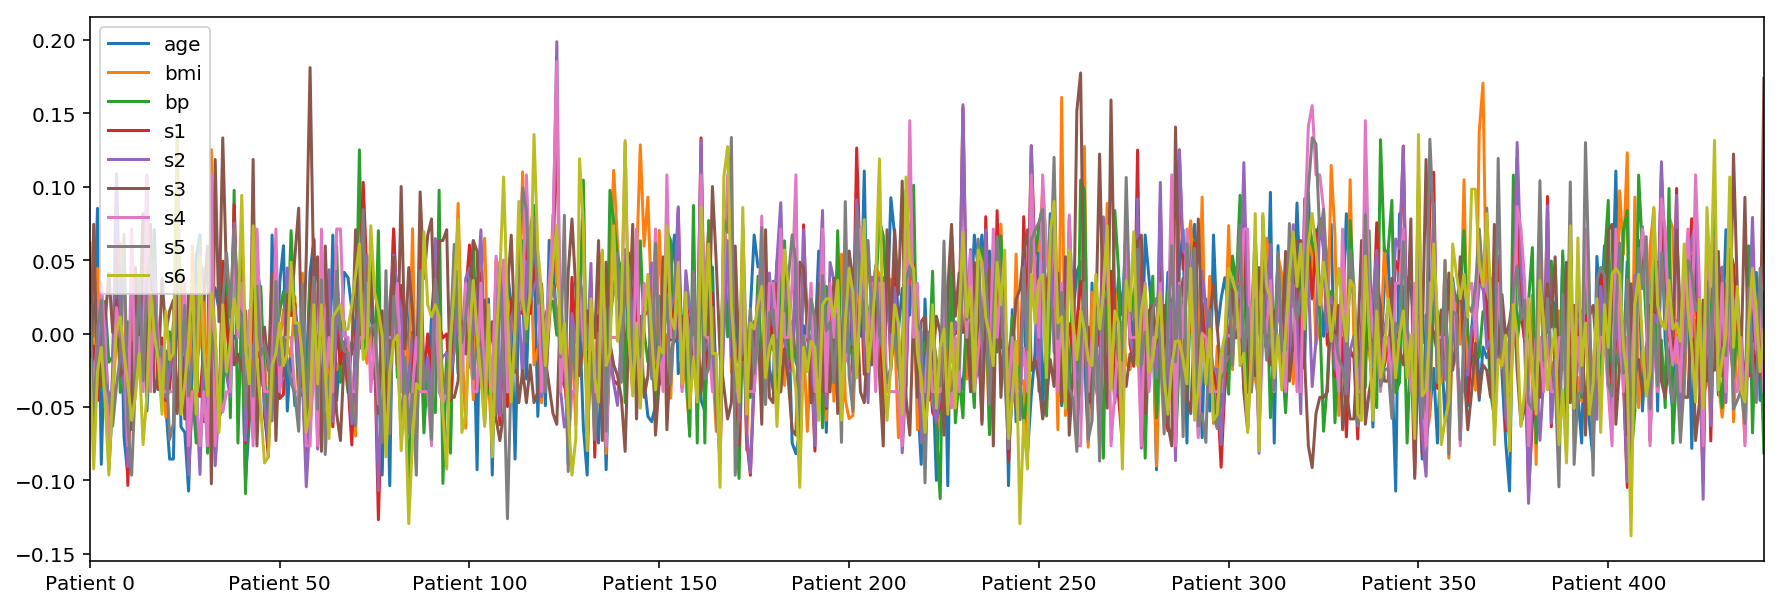

In [87]:
df.plot();

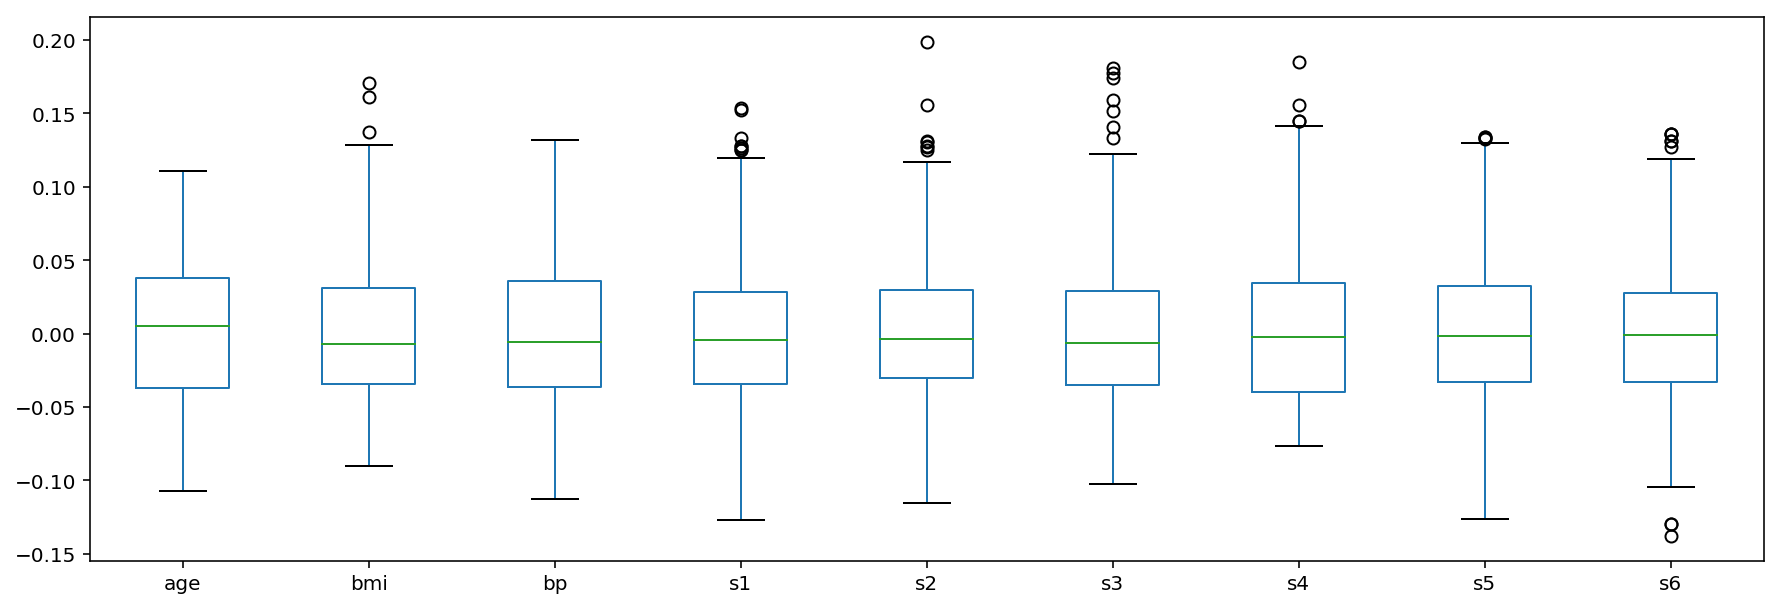

In [112]:
df.plot.box();

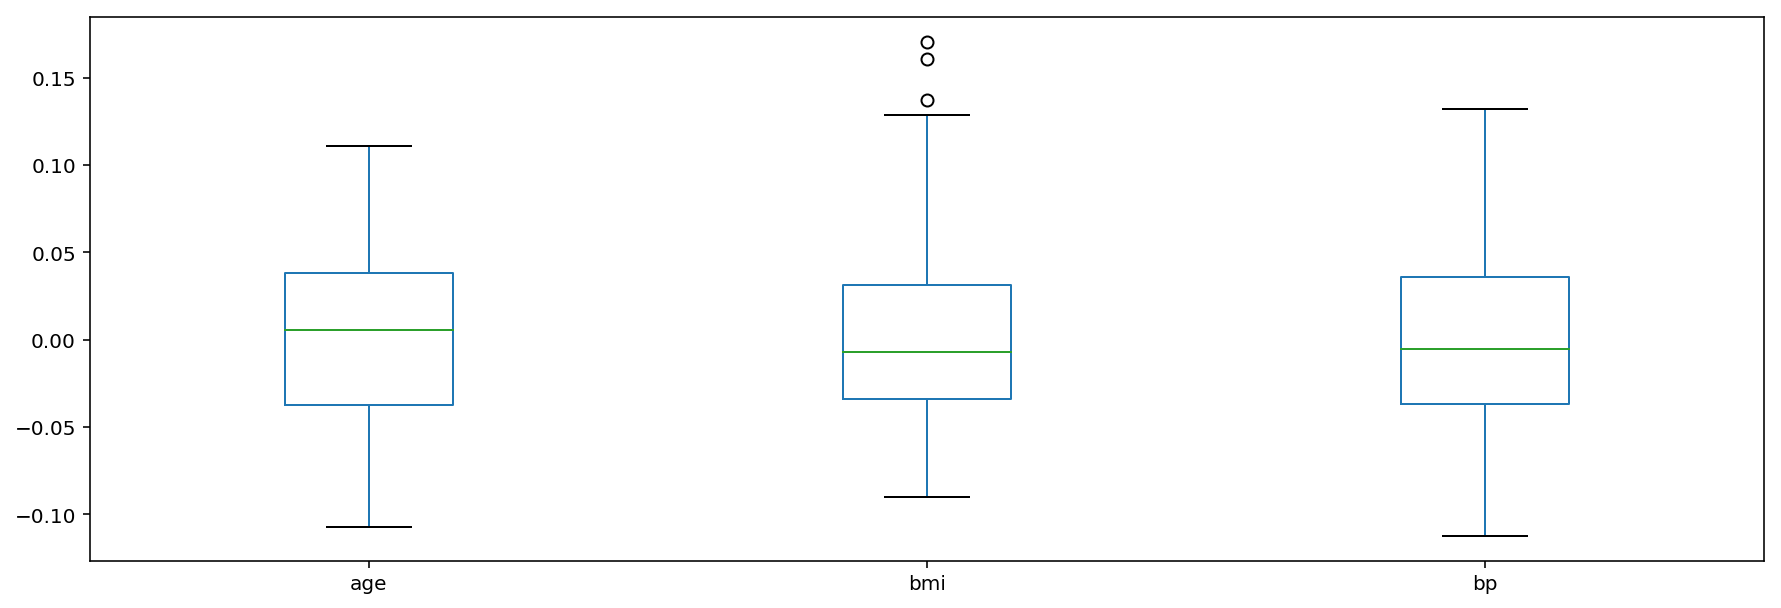

In [113]:
df.loc[:, :"bp"].plot.box();

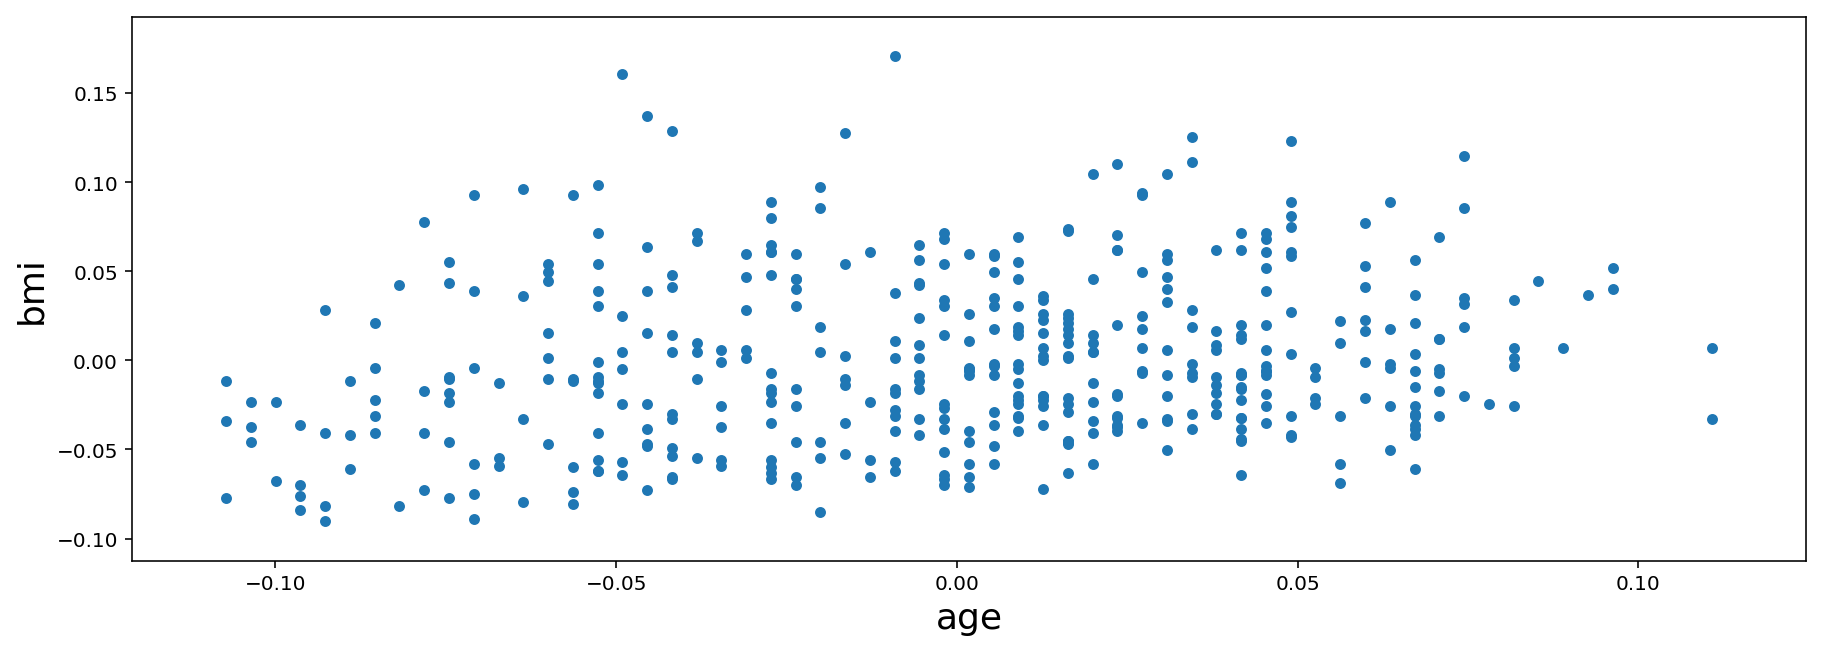

In [114]:
df.plot.scatter(x='age', y='bmi');

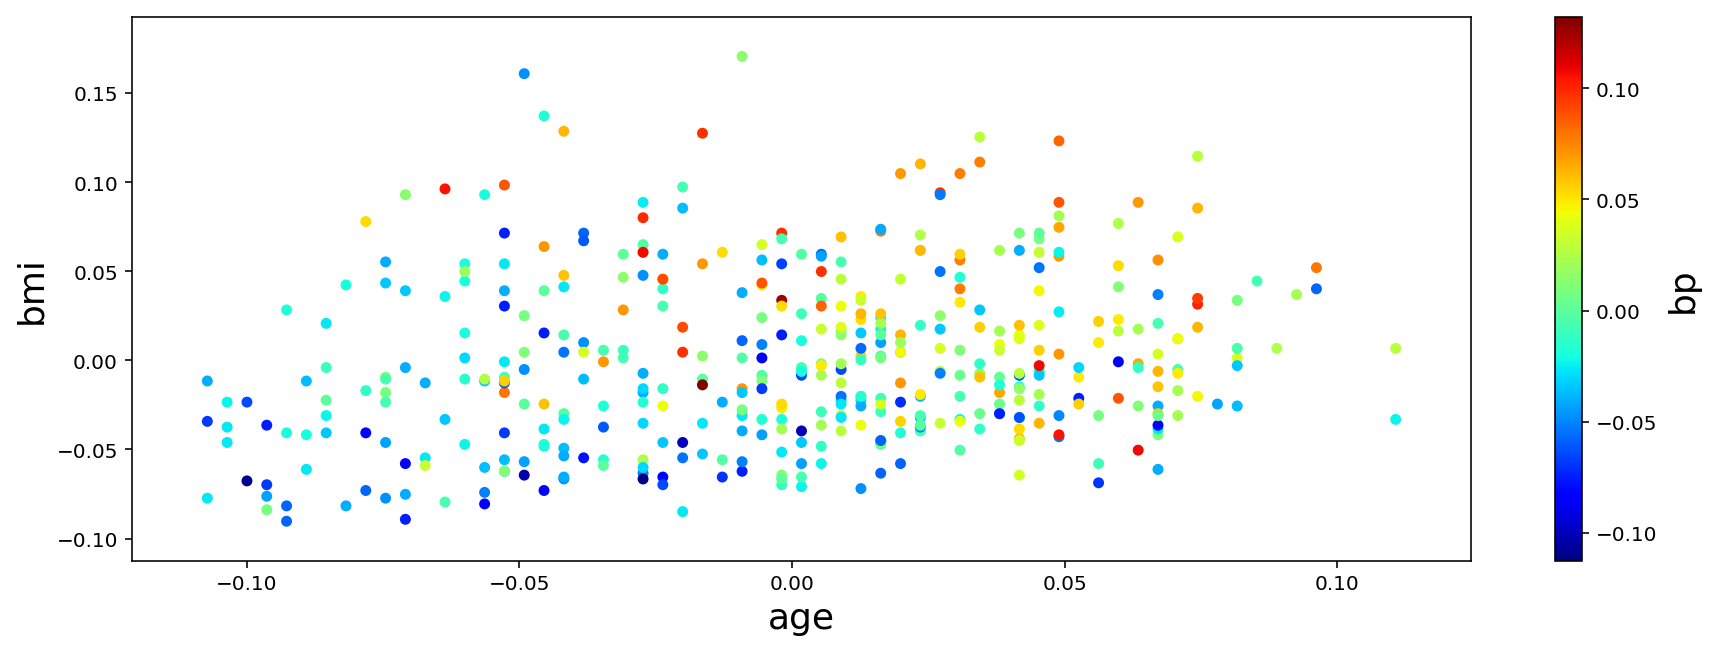

In [167]:
df.plot.scatter(x='age', y='bmi', c='bp', colormap='jet');

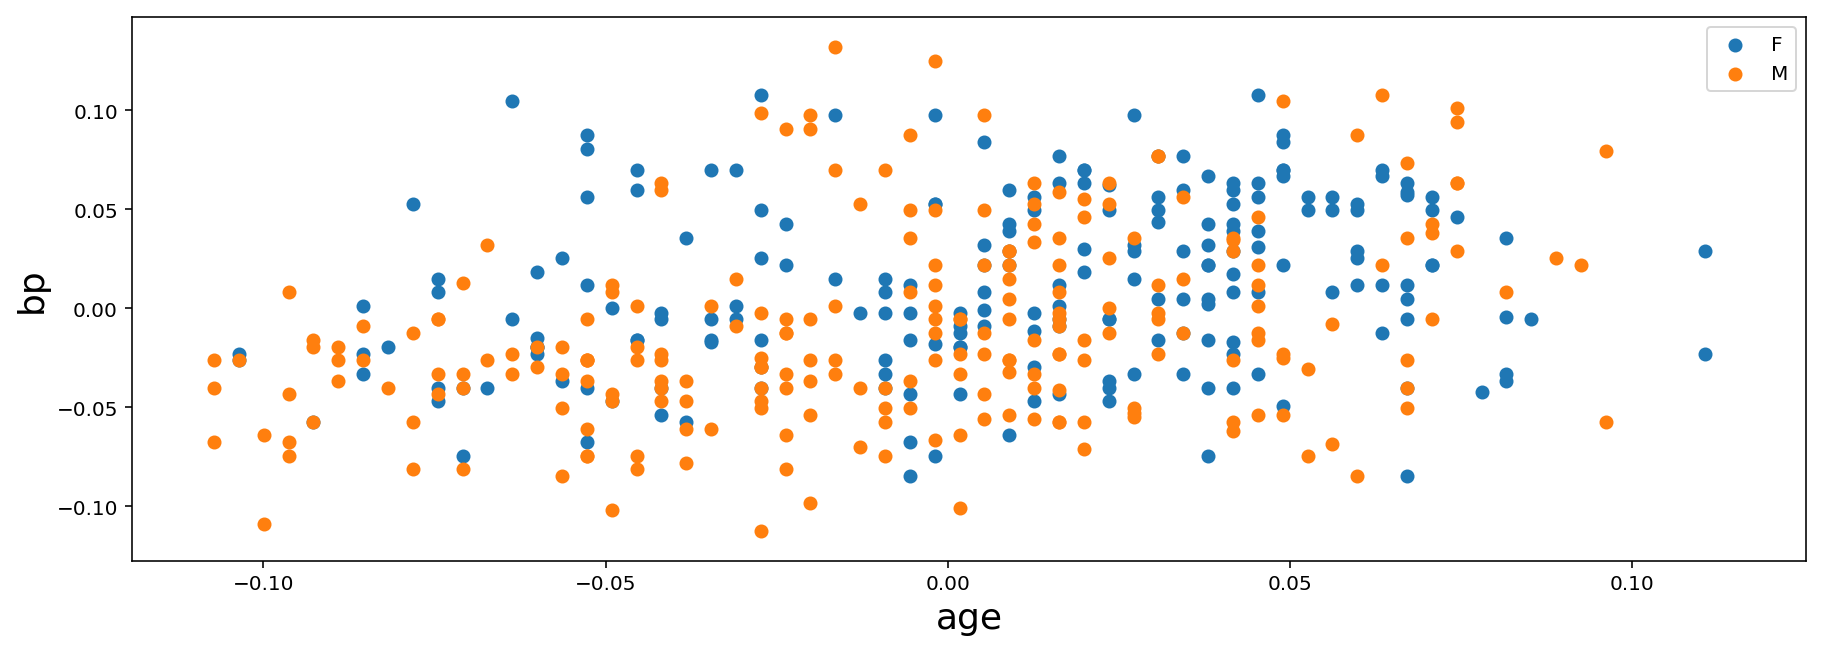

In [170]:
female = df[df['sex'] == "F"]
male = df[df['sex'] == "M"]

plt.scatter(female['age'], female['bp'], label='F')
plt.scatter(male['age'], male['bp'], label='M')
plt.xlabel('age')
plt.ylabel('bp')
plt.legend();

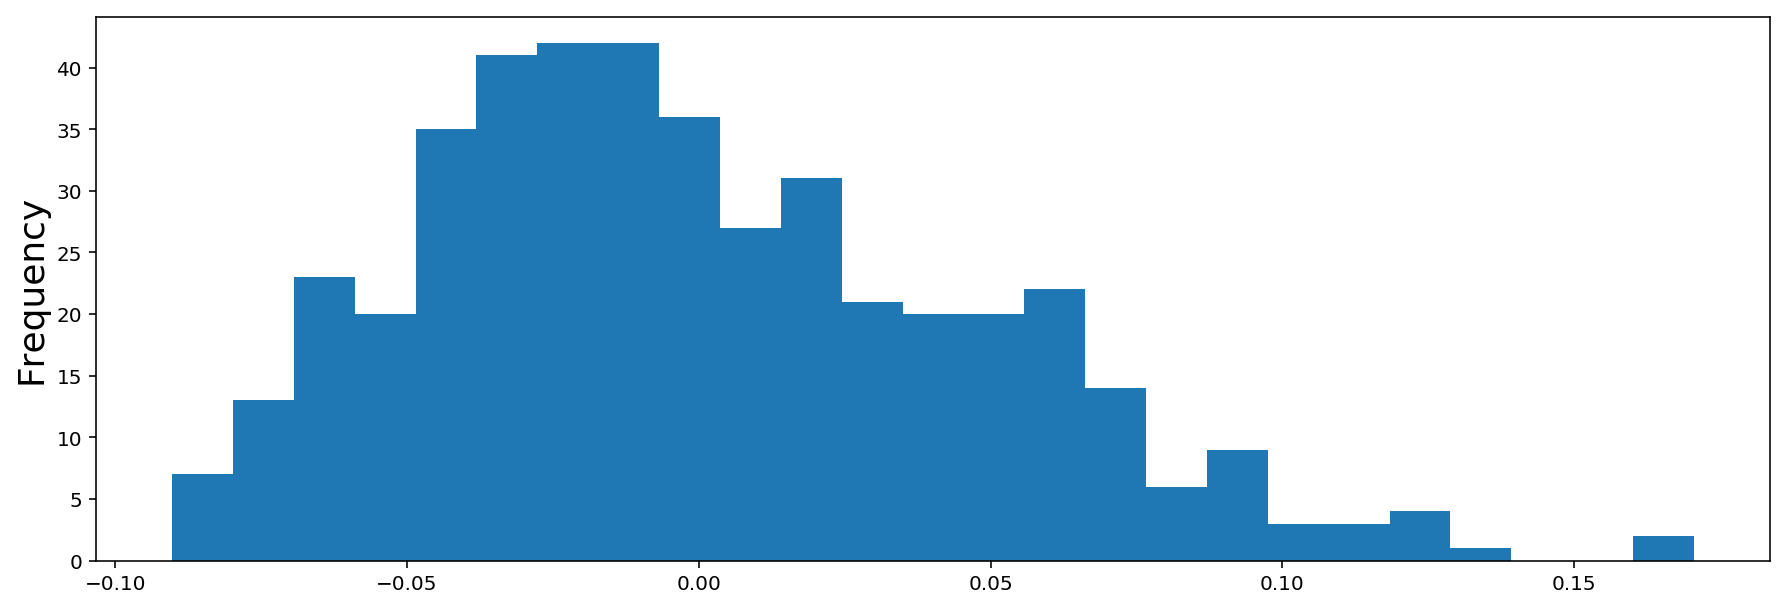

In [110]:
df['bmi'].plot.hist(bins=25);

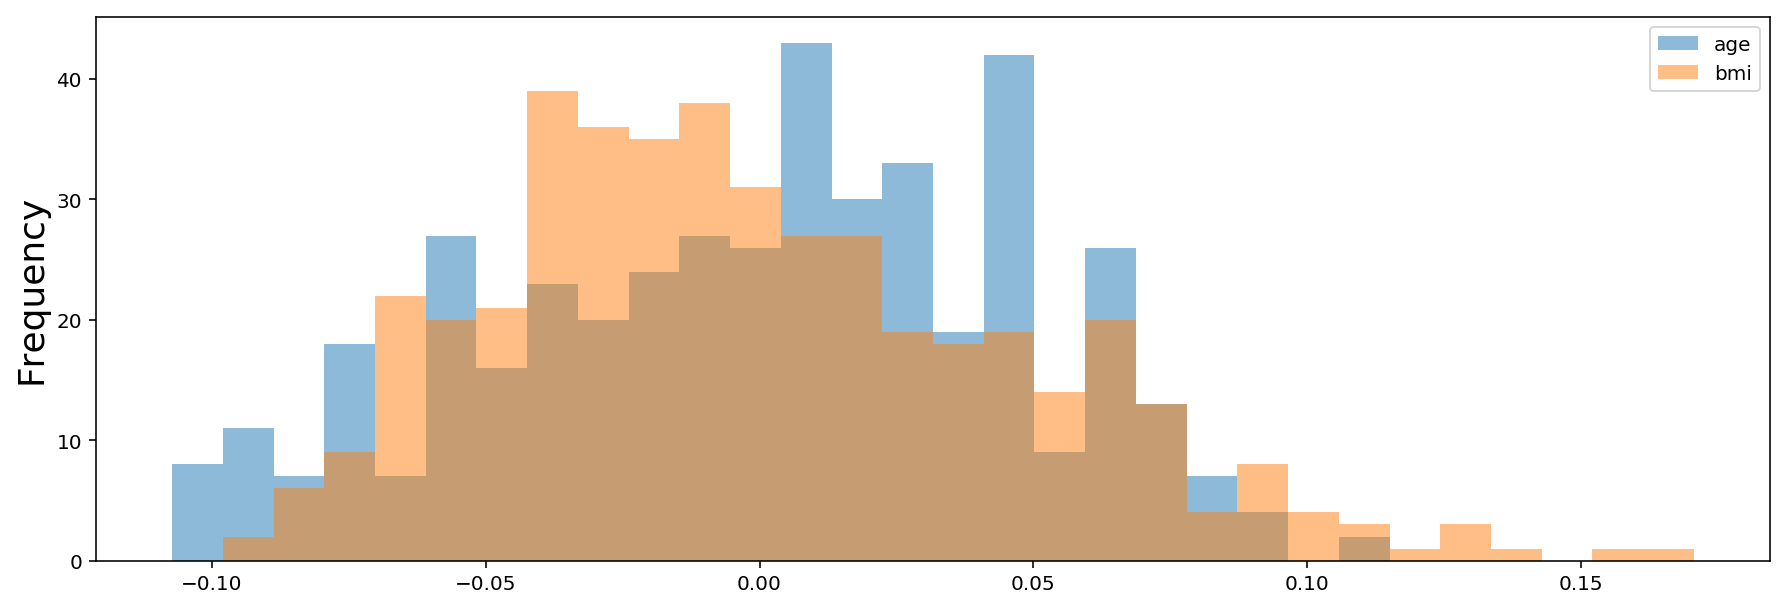

In [108]:
df[['age', 'bmi']].plot.hist(bins=30, alpha=0.5);

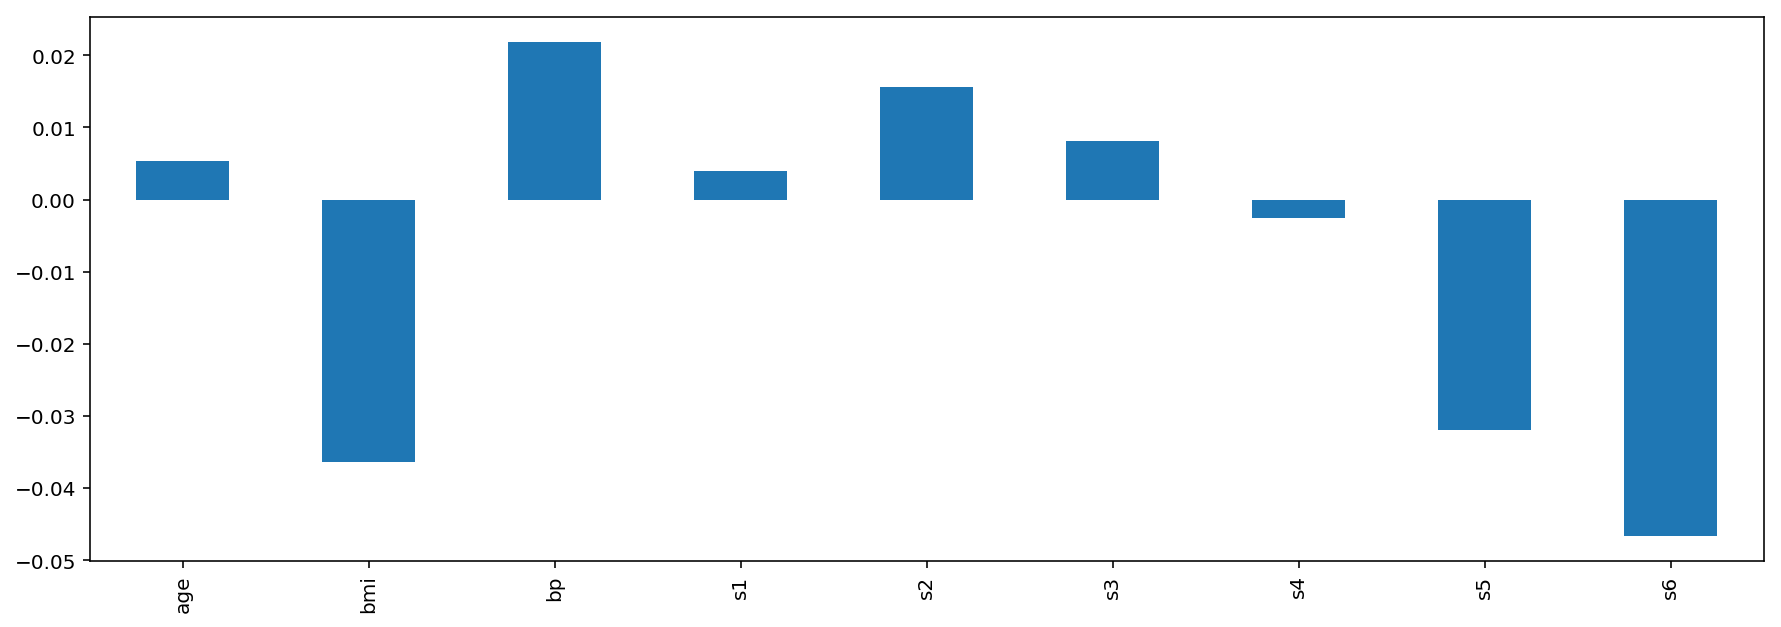

In [111]:
df.loc["Patient 4", [col for col in df.columns if col != 'sex']].plot.bar();

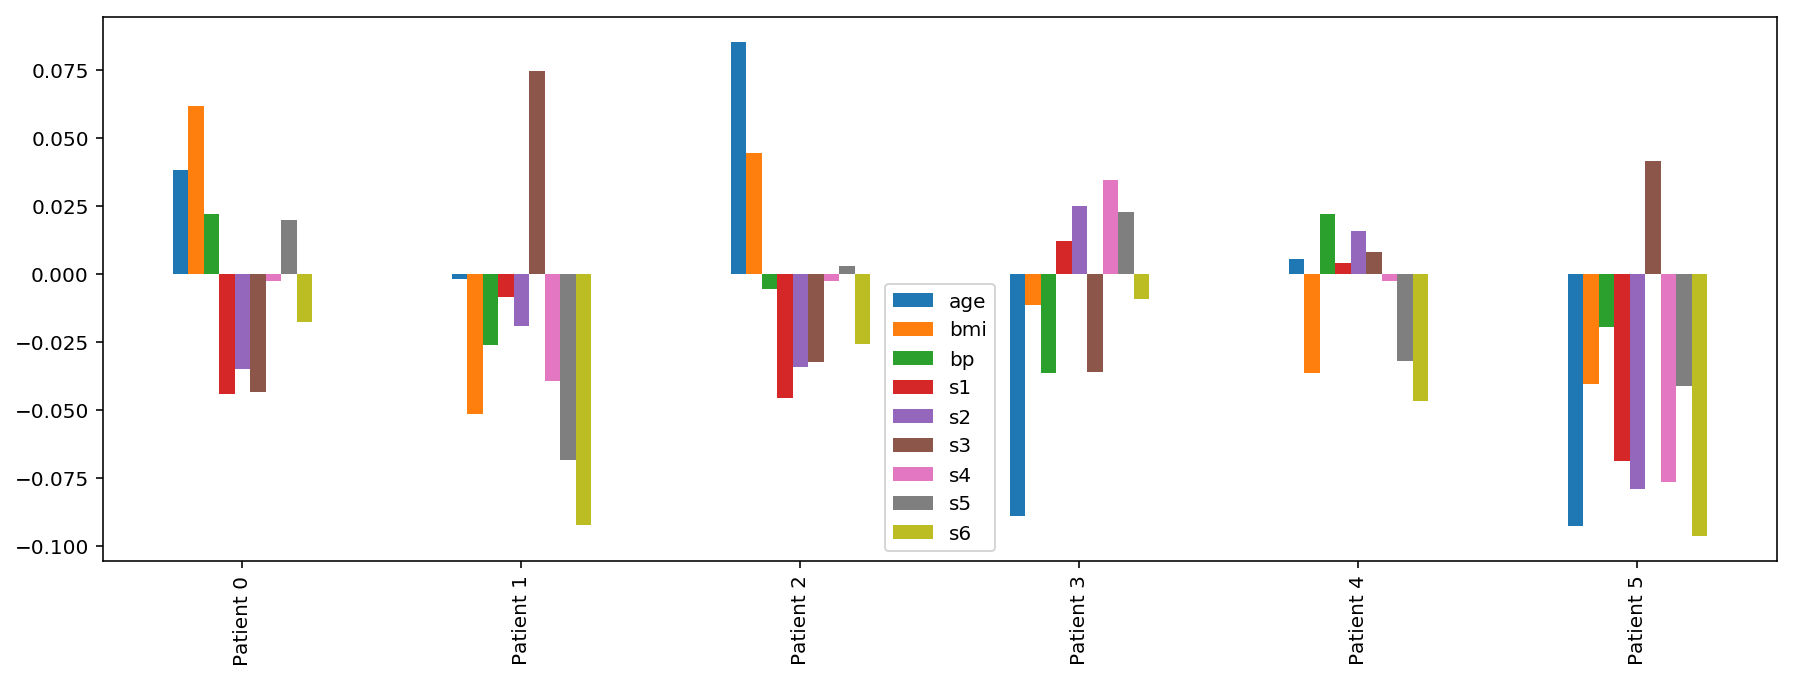

In [100]:
df.loc[:"Patient 5", [col for col in df.columns if col != 'sex']].plot.bar();

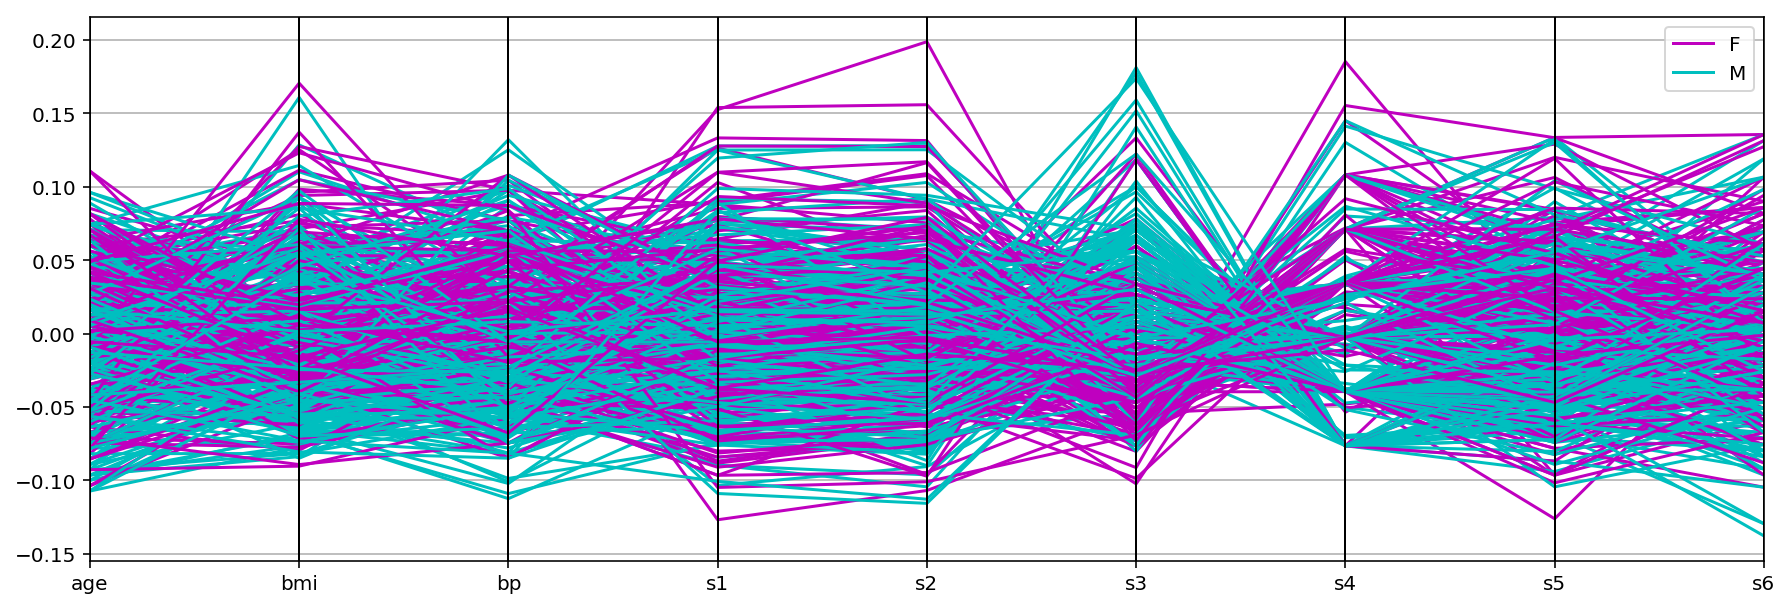

In [164]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df, 'sex', color=['m', 'c']);

In [166]:
from pandas.plotting import andrews_curves

andrews_curves(df, 'sex', colormap='winter');

In [156]:
import seaborn as sns

df['disease'] = y

sns.pairplot(df);

---
## Correlations between columns

In [64]:
df.corr()

age       bmi        bp        s1        s2        s3        s4  \
age      1.000000  0.185085  0.335427  0.260061  0.219243 -0.075181  0.203841   
bmi      0.185085  1.000000  0.395415  0.249777  0.261170 -0.366811  0.413807   
bp       0.335427  0.395415  1.000000  0.242470  0.185558 -0.178761  0.257653   
s1       0.260061  0.249777  0.242470  1.000000  0.896663  0.051519  0.542207   
s2       0.219243  0.261170  0.185558  0.896663  1.000000 -0.196455  0.659817   
s3      -0.075181 -0.366811 -0.178761  0.051519 -0.196455  1.000000 -0.738493   
s4       0.203841  0.413807  0.257653  0.542207  0.659817 -0.738493  1.000000   
s5       0.270777  0.446159  0.393478  0.515501  0.318353 -0.398577  0.617857   
s6       0.301731  0.388680  0.390429  0.325717  0.290600 -0.273697  0.417212   
disease  0.187889  0.586450  0.441484  0.212022  0.174054 -0.394789  0.430453   

               s5        s6   disease  
age      0.270777  0.301731  0.187889  
bmi      0.446159  0.388680  0.586450  
bp       0.393478  0.390429  0.441484  
s1       0.515501  0.325717  0.212022  
s2       0.318353  0.290600  0.174054  
s3      -0.398577 -0.273697 -0.394789  
s4       0.617857  0.417212  0.430453  
s5       1.000000  0.464670  0.565883  
s6       0.464670  1.000000  0.382483  
disease  0.565883  0.382483  1.000000

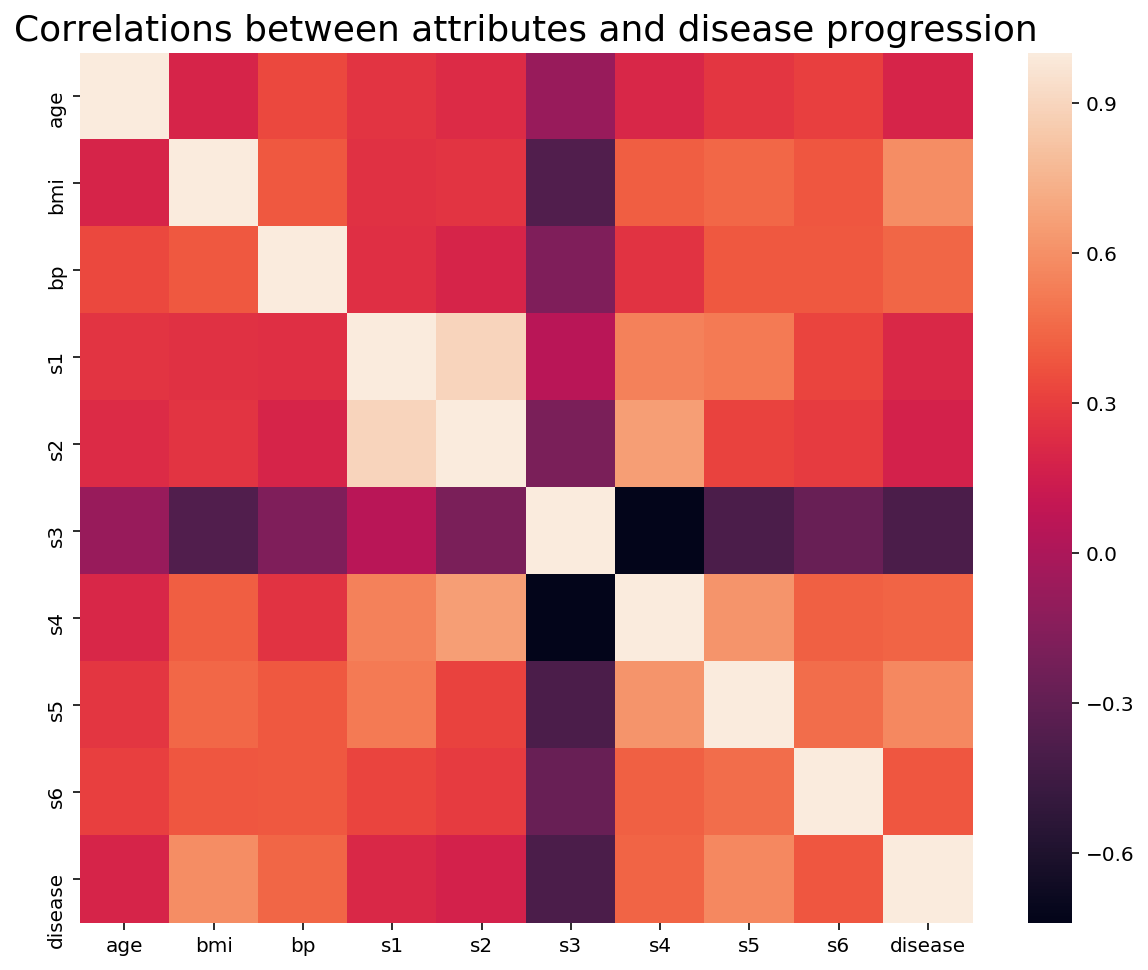

In [65]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr())
plt.title('Correlations between attributes and disease progression');